# Descripcion del dataset - SkillCraft 
### "Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning", (Tomphson et al., 2013).

El aprendisaje y desarrollo de habilidades que diferencian a una persona novata de un experto es un proceso complejo. Algunas habilidades pueden ser entrenadas en cortos periodos tiempo (tareas simples), mientras que otras requieren un alto esfuerzo motor y cognitivo para ser llevadas a cabo. Dependiendo de los distintos niveles en los que uno podria clasificar a la persona en funcion de su habilidad para una tarea (novato, intermedio, avanzado, profecional, etc), ciertas variables involucradas en la realizacion de la tarea tendran mayor o menor relevancia para la transicion entre las diferentes etapas de aprendisaje. StarcraftII es un juego de estrategia altamente complejo, con diferentes aspectos a tener en cuenta para ganarle al adversario. Este dataset posee el analisis de 2500 jugadores de Starcraft, clasificados en diferentes categorias (ligas) en las que juegan normalente. Del analisis de este dataset se podrian responder ciertas preguntas especificas al proceso de aprendisaje:

* En el proceso de aprendisaje de una tarea, todas las habilidades involucradas mejoran a la misma tasa?

* Todas las habilidades tienen el mismo peso en el proceso de aprendisaje o existen algunas que permiten grandes saltos?

y otras referidas al juego en si:

* Que caracteristicas poseen los diferentes jugadores de Starcraft de las distintas ligas?

* Se puede predicir la liga de un jugador en funcion de la telemetria de sus partidas?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("SkillCraft1_Dataset.csv",encoding = "latin")
df.head(2500)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6976,4,22,4,730,113.9184,0.002900,0.000214,8,0.000051,0.000368,0.003515,28.3415,69.8102,5.1971,28,0.000624,7,0.000000,0.000000
2496,6978,2,19,8,100,54.0606,0.000028,0.000028,1,0.000000,0.000057,0.002933,93.6078,83.0680,3.1553,14,0.000541,5,0.000000,0.000000
2497,6979,6,22,28,1400,113.8680,0.003547,0.000147,3,0.000000,0.000294,0.002520,40.8235,55.1456,7.4563,8,0.001150,3,0.000000,0.000122
2498,6980,6,20,6,125,275.7342,0.013411,0.000831,6,0.000199,0.000684,0.006892,12.3723,28.8191,5.7990,30,0.001160,8,0.000234,0.001030


## DATA CLEANNING

In [32]:
df=df.drop('GameID', axis=1)
df = df.replace('?', np.nan) 
df[["Age","HoursPerWeek","TotalHours"]] = df[["Age","HoursPerWeek","TotalHours"]].apply(pd.to_numeric)
print(df.columns)
print(df.dtypes) # All numeric variables

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


### Linear relationship between  features

<AxesSubplot:>

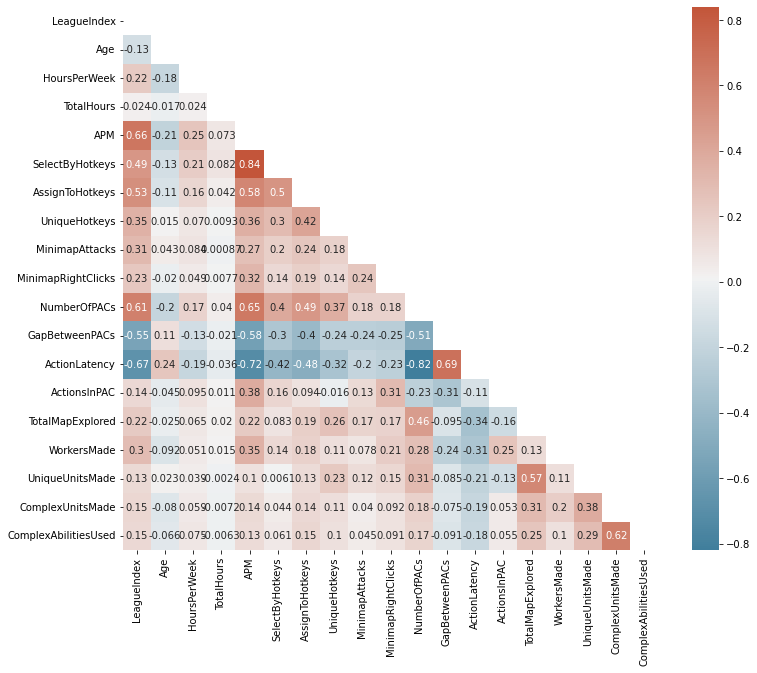

In [33]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:>

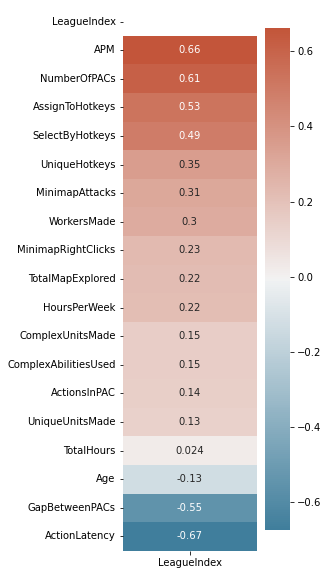

In [34]:
corr = df.corr()
x= corr[["LeagueIndex"]].sort_values(by ="LeagueIndex",ascending=False)
f, ax = plt.subplots(figsize=(3, 10))
mask = np.triu(np.ones_like(x, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x, annot=True, mask = mask, cmap=cmap)

Llamativamente, ni la edad del jugador ni el tiempo total jugado parecen correlacionarse positivamente con la liga del jugador ni con las otras variables evaluadas. Sin embargo, el tiempo jugado por semana parece correlacionarse positivamente (0.21) con la liga del jugador 

### Descrbiendo otras variables con posibles relaciones no lineales


<AxesSubplot:xlabel='LeagueIndex', ylabel='HoursPerWeek'>

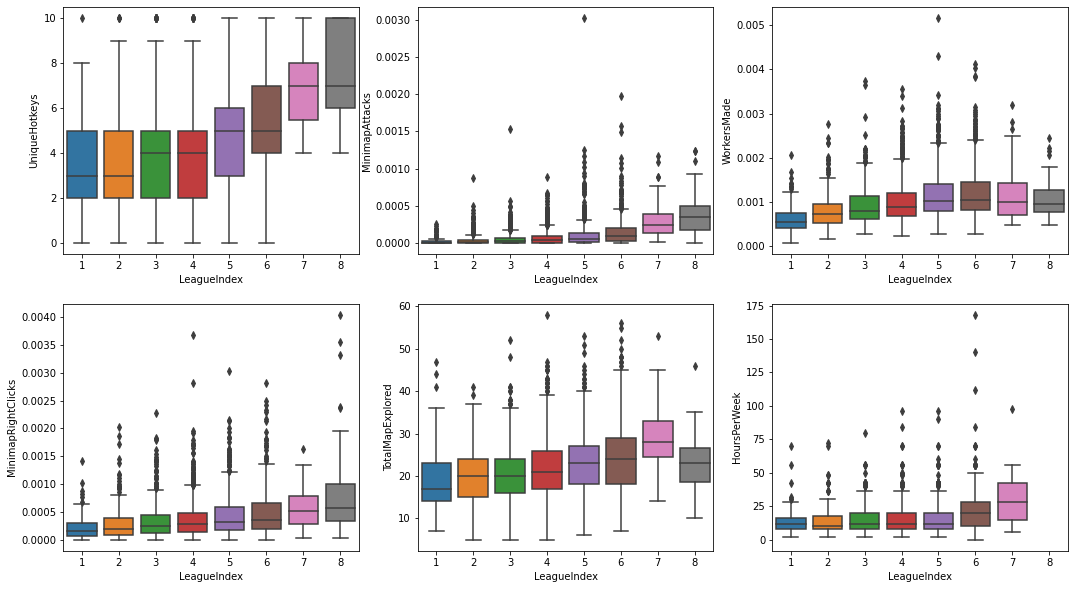

In [35]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 

 
sns.boxplot(ax=axes[0, 0], data=df, x='LeagueIndex', y='UniqueHotkeys')
sns.boxplot(ax=axes[0, 1], data=df, x='LeagueIndex', y='MinimapAttacks')
sns.boxplot(ax=axes[0, 2], data=df, x='LeagueIndex', y='WorkersMade')
sns.boxplot(ax=axes[1, 0], data=df, x='LeagueIndex', y='MinimapRightClicks')
sns.boxplot(ax=axes[1, 1], data=df, x='LeagueIndex', y='TotalMapExplored')
sns.boxplot(ax=axes[1, 2], data=df, x='LeagueIndex', y='HoursPerWeek')


<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

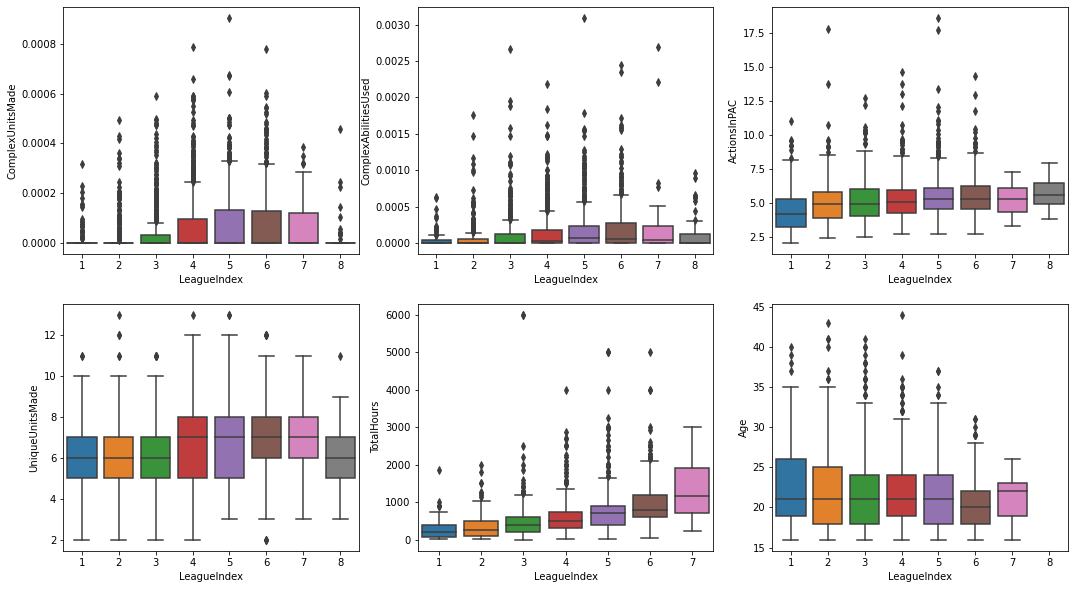

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='LeagueIndex', y='ComplexUnitsMade')
sns.boxplot(ax=axes[0, 1], data=df, x='LeagueIndex', y='ComplexAbilitiesUsed')
sns.boxplot(ax=axes[0, 2], data=df, x='LeagueIndex', y='ActionsInPAC')
sns.boxplot(ax=axes[1, 0], data=df, x='LeagueIndex', y='UniqueUnitsMade')
sns.boxplot(ax=axes[1, 1], data=df[(df["TotalHours"]  < 7500)], x='LeagueIndex', y='TotalHours')
sns.boxplot(ax=axes[1, 2], data=df, x='LeagueIndex', y='Age')
 
                                  

### Como se relacionan las respuestas temporales con los jugadores de las diferentes ligas?
APM: Acciones por minuto //
ActionLatency: Mide el tiempo de reaccion ante un estimulo nuevo

<AxesSubplot:xlabel='ActionLatency', ylabel='APM'>

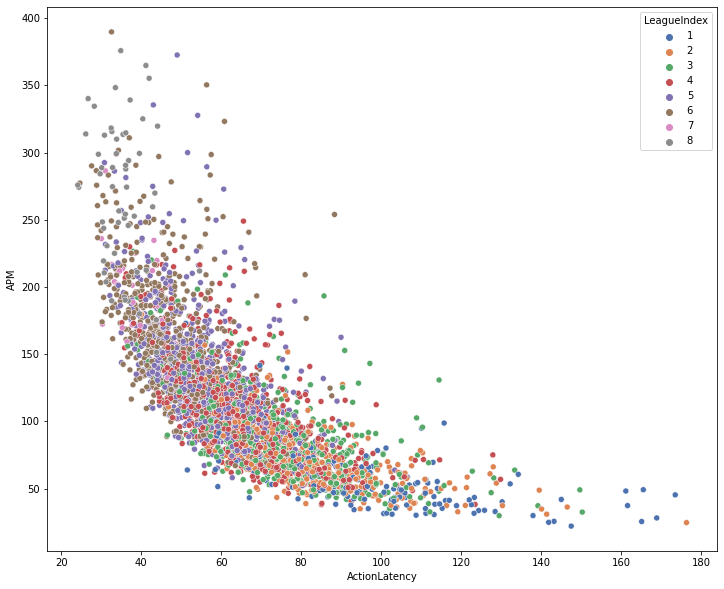

In [47]:
f, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="ActionLatency", y="APM", hue="LeagueIndex", palette="deep")


Esto sugiere que independientemente del numero de horas empleado,  el jugador debe entrenar ciertos aspectos especificos de su juego para subir o ser considerado de una categoria mayor.

Las categorias bajas estan asociadas a tiempos de latencia altos y numeros de acciones por minuto menores. Sin embargo, a partir de la 3 categoria, los jugadores presentan tiempos de respuestas a estimulos similares, sugiriendo que hay otros aspectos a tener en cuenta para la clasificacion y generacion de un futuro modelo predictivo. 

## Desarrollo de un algoritmo optimo para la clasificacion de jugadores